# Analysis of IMDB Data on AWS EMR with Spark

In [1]:
# Analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data
# This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset)

# Part I – Installation and Initial Setup

In [ ]:
%%info

In [ ]:
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib==3.2.1")

In [9]:
# verify

sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.7
cycler                     0.11.0
docutils                   0.14
jmespath                   1.0.1
joblib                     1.3.2
kiwisolver                 1.4.5
lockfile                   0.11.0
lxml                       4.9.3
matplotlib                 3.2.1
mysqlclient                1.4.2
nltk                       3.8.1
nose                       1.3.4
numpy                      1.20.0
pandas                     1.0.5
pip                        20.2.2
py-dateutil                2.2
pyparsing                  3.1.4
pystache                   0.5.4
python-daemon              2.2.3
python-dateutil            2.9.0.post0
python37-sagemaker-pyspark 1.4.2
pytz                       2023.3
PyYAML                     5.4.1
regex                      2021.11.10
setuptools             

In [10]:
# import

import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

In [11]:
# load all data from S3 into spark dataframes

name = spark.read.csv('name.basics.new.tsv', sep='\t', header=True, inferSchema=True)
title = spark.read.csv('title.basic.new.tsv', sep='\t', header=True, inferSchema=True)
principle = spark.read.csv('title.principles.new.tsv', sep='\t', header=True, inferSchema=True)
rating = spark.read.csv('title.ratings.new.tsv', sep='\t', header=True, inferSchema=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
# these are essential functions, might as well bring them in all at once in the beginning

from pyspark.sql.functions import collect_set, col, split, explode, countDistinct, avg, max, min, first, last, count, round

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

In [13]:
# Display the schema below

name.printSchema()
name.show(3, truncate=False)
name.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

+---------+---------------+---------+---------+-----------------------------------+---------------------------------------+
|nconst   |primaryName    |birthYear|deathYear|primaryProfession                  |knownForTitles                         |
+---------+---------------+---------+---------+-----------------------------------+---------------------------------------+
|nm0000001|Fred Astaire   |1899     |1987     |soundtrack,actor,miscellaneous     |tt0027125,tt0050419,tt0053137,tt0072308|
|nm0000002|Lauren Bacall  |1924     |2014     |actress,soundtrack                 |tt0075213,tt0117057,tt0038355,tt0037382|
|nm0000003|Brigitte Bardot|1934     |\N       |actress,soundtrack,music_department|tt0049189,tt0054452,tt0056404,tt0

In [14]:
# Display the first 15 rows with the following columns:

# nconst
# primaryName
# primaryProfession
# birthYear

name.select('nconst', 'primaryName', 'primaryProfession', 'birthYear').show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+-------------------------------------+---------+
|nconst   |primaryName        |primaryProfession                    |birthYear|
+---------+-------------------+-------------------------------------+---------+
|nm0000001|Fred Astaire       |soundtrack,actor,miscellaneous       |1899     |
|nm0000002|Lauren Bacall      |actress,soundtrack                   |1924     |
|nm0000003|Brigitte Bardot    |actress,soundtrack,music_department  |1934     |
|nm0000004|John Belushi       |actor,soundtrack,writer              |1949     |
|nm0000005|Ingmar Bergman     |writer,director,actor                |1918     |
|nm0000006|Ingrid Bergman     |actress,soundtrack,producer          |1915     |
|nm0000007|Humphrey Bogart    |actor,soundtrack,producer            |1899     |
|nm0000008|Marlon Brando      |actor,soundtrack,director            |1924     |
|nm0000009|Richard Burton     |actor,soundtrack,producer            |1925     |
|nm0000010|James Cagney       |actor,sou

## Title Basics

In [15]:
# Display the schema below

title.printSchema()
title.show(3, truncate=False)
title.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+----------------------+----------------------+-------+---------+-------+--------------+------------------------+
|tconst   |titleType|primaryTitle          |originalTitle         |isAdult|startYear|endYear|runtimeMinutes|genres                  |
+---------+---------+----------------------+----------------------+-------+---------+-------+--------------+------------------------+
|tt0000001|short    |Carmencita            |Carmencita            |0      |1894     |\N     |1             |Documentary,Short       |
|tt0000002|short    |Le clown et ses chiens|Le clown et ses chiens|0      |1892     |\N

In [16]:
# Display the first 5 rows with the following columns:

# tconst
# titleType
# primaryTitle
# genres

title.select('tconst', 'titleType', 'primaryTitle', 'genres').show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+----------------------+------------------------+
|tconst   |titleType|primaryTitle          |genres                  |
+---------+---------+----------------------+------------------------+
|tt0000001|short    |Carmencita            |Documentary,Short       |
|tt0000002|short    |Le clown et ses chiens|Animation,Short         |
|tt0000003|short    |Pauvre Pierrot        |Animation,Comedy,Romance|
|tt0000004|short    |Un bon bock           |Animation,Short         |
|tt0000005|short    |Blacksmith Scene      |Comedy,Short            |
+---------+---------+----------------------+------------------------+
only showing top 5 rows

In [17]:
# Display the unique title types below

# title.select(collect_set('titleType').alias("titleType")).show()

title.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
|     tvPilot|
+------------+

In [18]:
# Remove the 'originalTitle' from the dataframe and display the schema to verify it

title2 = title.drop('originalTitle')
title2.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

In [19]:
# compared with the original schema

title.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principals

In [20]:
# Display the schema below

principle.printSchema()
principle.show(3, truncate=False)
principle.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

+---------+--------+---------+---------------+-----------------------+----------+
|tconst   |ordering|nconst   |category       |job                    |characters|
+---------+--------+---------+---------------+-----------------------+----------+
|tt0000001|1       |nm1588970|self           |\N                     |["Self"]  |
|tt0000001|2       |nm0005690|director       |\N                     |\N        |
|tt0000001|3       |nm0374658|cinematographer|director of photography|\N        |
+---------+--------+---------+---------------+-----------------------+----------+
only showing top 3 rows

60833800

In [21]:
# Display the first 15 rows where the "category" column is "producer"

# principle.filter(col('category') == 'producer').show(15, truncate=False)
principle.filter(principle.category == 'producer').show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+--------+----------+
|tconst   |ordering|nconst   |category|job     |characters|
+---------+--------+---------+--------+--------+----------+
|tt0000003|2       |nm1770680|producer|producer|\N        |
|tt0000005|4       |nm0249379|producer|producer|\N        |
|tt0000007|5       |nm0249379|producer|producer|\N        |
|tt0000020|2       |nm0666972|producer|producer|\N        |
|tt0000024|4       |nm0666972|producer|producer|\N        |
|tt0000025|2       |nm0666972|producer|producer|\N        |
|tt0000039|1       |nm0666972|producer|producer|\N        |
|tt0000041|2       |nm0525908|producer|producer|\N        |
|tt0000061|3       |nm0666972|producer|producer|\N        |
|tt0000089|3       |nm0525910|producer|producer|\N        |
|tt0000104|1       |nm0525910|producer|producer|\N        |
|tt0000121|5       |nm0666972|producer|producer|\N        |
|tt0000125|1       |nm0666972|producer|producer|\N        |
|tt0000147|6       |nm0103755|producer|p

## Title Ratings

In [22]:
# Display the schema below

rating.printSchema()
rating.show(3, truncate=False)
rating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)

+---------+-------------+--------+
|tconst   |averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|5.7          |2033    |
|tt0000002|5.7          |272     |
|tt0000003|6.5          |1977    |
+---------+-------------+--------+
only showing top 3 rows

1412275

In [23]:
# Display the first 10 rows in a descending order by the number of votes

rating.sort(col('numVotes').desc()).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2868594|
|tt0468569|          9.0| 2850372|
|tt1375666|          8.8| 2531543|
|tt0137523|          8.8| 2303989|
|tt0944947|          9.2| 2265760|
|tt0109830|          8.8| 2239746|
|tt0110912|          8.9| 2203191|
|tt0903747|          9.5| 2114358|
|tt0816692|          8.7| 2073181|
|tt0133093|          8.7| 2038364|
+---------+-------------+--------+
only showing top 10 rows

## Overview of Data

In [24]:
# Display the number of rows and columns in each dataFrame object

print('Number of columns in Name Basics table:', len(name.columns))
print('Number of rows in Name Basics table:', name.count(), '\n')

print('Number of columns in Title Basics table:', len(title.columns))
print('Number of rows in Title Basics table:', title.count(), '\n')

print('Number of columns in Title Principals table:', len(principle.columns))
print('Number of rows in Title Principals table:', principle.count(), '\n')

print('Number of columns in Title Ratings table:', len(rating.columns))
print('Number of rows in Title Ratings table:',  rating.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 13329316 

Number of columns in Title Basics table: 9
Number of rows in Title Basics table: 10613322 

Number of columns in Title Principals table: 6
Number of rows in Title Principals table: 60833800 

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 1412275

# Part 2 – Analyzing Movie Genres

In [25]:
# how many unique movie genres are represented in this dataset?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Association Table

In [26]:
title2.select('tconst','titleType','genres').show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
|tt0000006|short    |Short                   |
|tt0000007|short    |Short,Sport             |
|tt0000008|short    |Documentary,Short       |
|tt0000009|movie    |Romance                 |
|tt0000010|short    |Documentary,Short       |
|tt0000011|short    |Documentary,Short       |
|tt0000012|short    |Documentary,Short       |
|tt0000013|short    |Documentary,Short       |
|tt0000014|short    |Comedy,Short            |
|tt0000015|short    |Animation,Short         |
+---------+---------+------------------------+
only showing top 15 rows

In [27]:
# we are only interested in 'movie'

titleMovie = title2.filter(title2.titleType == 'movie')
titleMovie.show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------------------------------------------+-------+---------+-------+--------------+--------------------------+
|tconst   |titleType|primaryTitle                                   |isAdult|startYear|endYear|runtimeMinutes|genres                    |
+---------+---------+-----------------------------------------------+-------+---------+-------+--------------+--------------------------+
|tt0000009|movie    |Miss Jerry                                     |0      |1894     |\N     |45            |Romance                   |
|tt0000147|movie    |The Corbett-Fitzsimmons Fight                  |0      |1897     |\N     |100           |Documentary,News,Sport    |
|tt0000502|movie    |Bohemios                                       |0      |1905     |\N     |100           |\N                        |
|tt0000574|movie    |The Story of the Kelly Gang                    |0      |1906     |\N     |70            |Action,Adventure,Biography|
|tt0000591|movie    |The Prodigal 

In [28]:
# denormalize

titleDF = titleMovie.withColumn('genres', explode(split('genres', ',')))
titleDF.select('tconst','titleType','genres').show(25, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|genres     |
+---------+---------+-----------+
|tt0000009|movie    |Romance    |
|tt0000147|movie    |Documentary|
|tt0000147|movie    |News       |
|tt0000147|movie    |Sport      |
|tt0000502|movie    |\N         |
|tt0000574|movie    |Action     |
|tt0000574|movie    |Adventure  |
|tt0000574|movie    |Biography  |
|tt0000591|movie    |Drama      |
|tt0000615|movie    |Drama      |
|tt0000630|movie    |Drama      |
|tt0000675|movie    |Drama      |
|tt0000679|movie    |Adventure  |
|tt0000679|movie    |Fantasy    |
|tt0000838|movie    |\N         |
|tt0000842|movie    |\N         |
|tt0000846|movie    |\N         |
|tt0000850|movie    |\N         |
|tt0000859|movie    |\N         |
|tt0000862|movie    |\N         |
|tt0000867|movie    |\N         |
|tt0000868|movie    |\N         |
|tt0000869|movie    |\N         |
|tt0000879|movie    |\N         |
|tt0000886|movie    |Drama      |
+---------+---------+-----------+
only showing t

## Total Unique Movie Genres

In [29]:
# What is the total number of unique movie genres?

titleDF.select(countDistinct('genres').alias('total number of unique movie genres')).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------+
|total number of unique movie genres|
+-----------------------------------+
|                                 29|
+-----------------------------------+

In [30]:
# or

titleDF.select('genres').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [31]:
# What are the unique movie genres?
# notice we get rid of '\N' in this step, which is considered a genre in the dataset

# titleDF.select(collect_set('genres').alias('unique movie genres')).show(truncate=False)
titleDF.select(col('genres').alias('unique movie genres')).filter(col('genres') != r'\N').distinct().show(30, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|unique movie genres|
+-------------------+
|Mystery            |
|Musical            |
|Sport              |
|Action             |
|Talk-Show          |
|Romance            |
|Thriller           |
|Reality-TV         |
|Family             |
|Fantasy            |
|History            |
|Animation          |
|Film-Noir          |
|Short              |
|Sci-Fi             |
|News               |
|Drama              |
|Documentary        |
|Western            |
|Comedy             |
|Crime              |
|War                |
|Game-Show          |
|Adult              |
|Music              |
|Biography          |
|Adventure          |
|Horror             |
+-------------------+

## Top Genres by Movies

In [32]:
# highest rated genres in this dataset by rolling up genres

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Average Rating / Genre

In [33]:
# inner join two dataframes (title ratings and title basics) by tconst
# get rid of '\N' which does not make sense in the analysis

titleDF_rating = titleDF.filter(col('genres') != r'\N').join(rating, 'tconst')
titleDF_rating.show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------------+-------+---------+-------+--------------+---------+-------------+--------+
|tconst   |titleType|primaryTitle                  |isAdult|startYear|endYear|runtimeMinutes|genres   |averageRating|numVotes|
+---------+---------+------------------------------+-------+---------+-------+--------------+---------+-------------+--------+
|tt0000675|movie    |Don Quijote                   |0      |1908     |\N     |\N            |Drama    |4.2          |20      |
|tt0000941|movie    |Locura de amor                |0      |1909     |\N     |45            |Drama    |4.5          |27      |
|tt0001911|movie    |Nell Gwynne                   |0      |1911     |\N     |50            |Biography|3.6          |25      |
|tt0001911|movie    |Nell Gwynne                   |0      |1911     |\N     |50            |Drama    |3.6          |25      |
|tt0001911|movie    |Nell Gwynne                   |0      |1911     |\N     |50            |History  |3.6     

In [36]:
# curiously
# this shows that the join is an intersection of both tables
# among 916533 movie titles, only 519061 has rating data

titleDF.filter(col('genres') != r'\N').count(), rating.count(), titleDF_rating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(916533, 1412275, 519061)

In [37]:
titleDF_rating.select('genres', 'averageRating').show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|genres   |averageRating|
+---------+-------------+
|Drama    |4.2          |
|Drama    |4.5          |
|Biography|3.6          |
|Drama    |3.6          |
|History  |3.6          |
|Drama    |6.0          |
|Drama    |5.0          |
|History  |5.0          |
|Biography|6.2          |
|Drama    |6.2          |
+---------+-------------+
only showing top 10 rows

In [38]:
# aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre
# note the avg() function will modify the column name to 'avg(averageRating)', which can be then used in the round() function

genre_avgRating = titleDF_rating.groupby('genres').avg('averageRating').select('genres', round('avg(averageRating)', 3).alias('averageRating'))
genre_avgRating.show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|genres     |averageRating|
+-----------+-------------+
|Mystery    |5.847        |
|Musical    |6.187        |
|Action     |5.732        |
|Sport      |6.623        |
|Talk-Show  |6.858        |
|Romance    |6.102        |
|Thriller   |5.613        |
|Reality-TV |6.701        |
|Family     |6.205        |
|Fantasy    |5.898        |
|History    |6.798        |
|Animation  |6.367        |
|Film-Noir  |6.463        |
|Sci-Fi     |5.353        |
|News       |7.203        |
|Drama      |6.248        |
|Documentary|7.216        |
|Western    |5.84         |
|Comedy     |5.906        |
|Crime      |5.985        |
+-----------+-------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

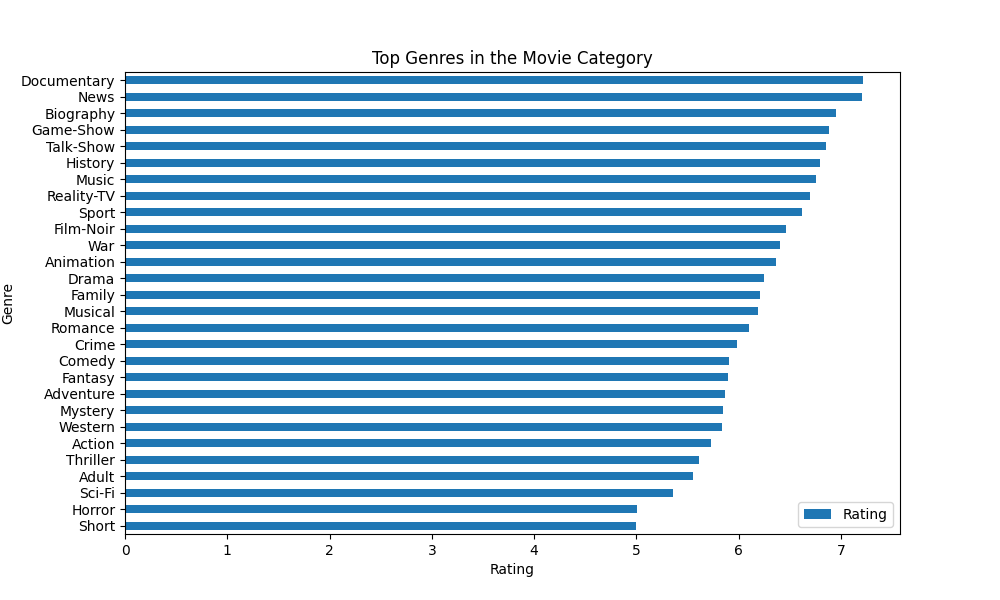

In [42]:
# a barchart of all genres
# no filter, all genres

genre_avgRating_pd = genre_avgRating.sort(col('averageRating').asc()).toPandas()
genre_avgRating_pd.plot.barh(x='genres', figsize=(10,6), title='Top Genres in the Movie Category')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.legend(['Rating'])

%matplot plt

# PART 3 - Analyzing Job Categories

## Total Unique Job Categories

In [45]:
# What is the total number of unique job categories
# first show the samples

principle.select('tconst', 'category').show(30, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|tconst   |category       |
+---------+---------------+
|tt0000001|self           |
|tt0000001|director       |
|tt0000001|cinematographer|
|tt0000002|director       |
|tt0000002|composer       |
|tt0000003|director       |
|tt0000003|producer       |
|tt0000003|composer       |
|tt0000003|editor         |
|tt0000004|director       |
|tt0000004|composer       |
|tt0000005|actor          |
|tt0000005|actor          |
|tt0000005|director       |
|tt0000005|producer       |
|tt0000006|director       |
|tt0000007|actor          |
|tt0000007|actor          |
|tt0000007|director       |
|tt0000007|director       |
|tt0000007|producer       |
|tt0000008|actor          |
|tt0000008|director       |
|tt0000008|cinematographer|
|tt0000009|actress        |
|tt0000009|actor          |
|tt0000009|actor          |
|tt0000009|director       |
|tt0000010|director       |
|tt0000011|actor          |
+---------+---------------+
only showing top 30 rows

In [46]:
# then the unique job category count

print('total number of unique job categories:', principle.select('category').distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

total number of unique job categories: 12

In [47]:
# What are the unique job categories available

principle.select('category').distinct().show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

In [48]:
# find the top job categories in this dataset by rolling up categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Counts of Titles / Job Category

In [50]:
principle.groupby('category').count().sort(col('count').desc()).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actor              |13443688|
|self               |10562296|
|actress            |10492210|
|writer             |8495903 |
|director           |7006843 |
|producer           |3944711 |
|cinematographer    |2068164 |
|composer           |2014049 |
|editor             |2012800 |
|archive_footage    |404581  |
|production_designer|383761  |
|archive_sound      |4794    |
+-------------------+--------+

### Bar Chart of Top Job Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

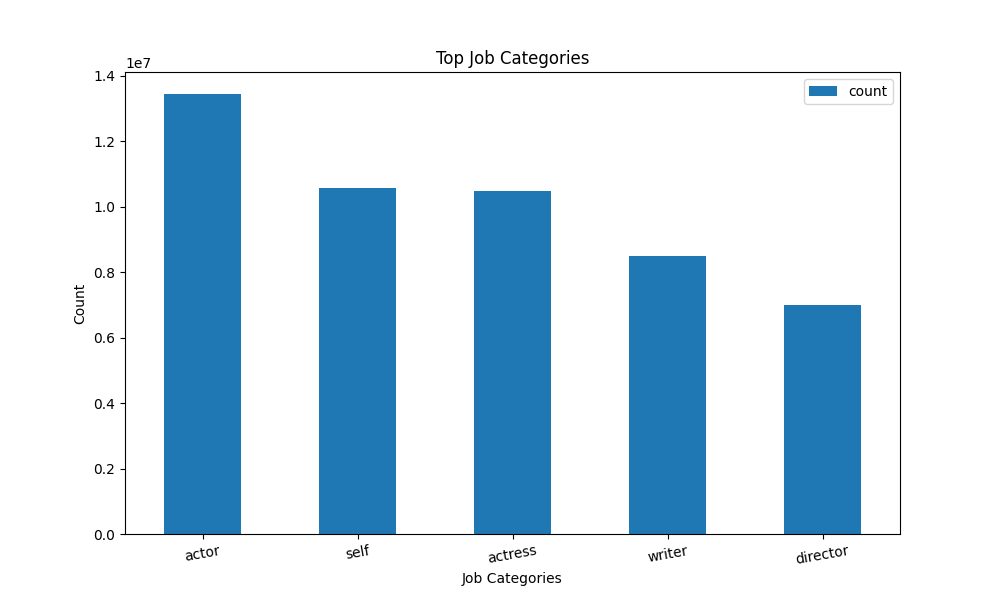

In [52]:
# a barchart of the top 5 categories

principle_count_pd = principle.groupby('category').count().sort(col('count').desc()).limit(5).toPandas()
principle_count_pd.plot.bar(x='category', figsize=(10,6), rot=10, title='Top Job Categories')

plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.legend(['count'])

%matplot plt

# PART 4 - Answer to the following questions

In [53]:
# recap of dfs that we have created
# original dfs:

# name
# title
# principle
# rating

# modified dfs:

# title2: title drop 'originalTitle' col
# titleMovie: title2 filter only 'movie'
# titleDF: titleMovie denormalized
# titleDF_rating: titleDF w/o '\N' inner join rating on tconst

# dfs in part 4:

# titleMovie_rating: titleMovie inner join rating on tconst
# principle_name: principle inner join name on nconst
# nameDenorm: name table denormalized
# nameDenorm_titleMovie: nameDenorm inner join titleMovie on tconst

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1) Which movies, released in 2003, have received more than 50,000 votes and have an average rating of 8 or higher?

In [54]:
# we already had the joined table for 'movie' only in titleType and with rating
# but it was denormalized / exploded
# also many rows were filtered out because of having '\N' as genre
# so we have to recreate a new joint table

# titleDF_rating

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
# the movie sub df of title df
# not denormalized and still has the '\N' genre

titleMovie.show(5)
titleMovie.count(), title2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000009|    movie|          Miss Jerry|      0|     1894|     \N|            45|             Romance|
|tt0000147|    movie|The Corbett-Fitzs...|      0|     1897|     \N|           100|Documentary,News,...|
|tt0000502|    movie|            Bohemios|      0|     1905|     \N|           100|                  \N|
|tt0000574|    movie|The Story of the ...|      0|     1906|     \N|            70|Action,Adventure,...|
|tt0000591|    movie|    The Prodigal Son|      0|     1907|     \N|            90|               Drama|
+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+
only showing top 5 rows

(674077, 10613322)

In [59]:
# again, not all titles have rating data
# 674077 movie, 306078 after inner join

titleMovie_rating = titleMovie.join(rating, 'tconst')
titleMovie_rating.show(5)
titleMovie_rating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|
+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
|tt0000675|    movie|         Don Quijote|      0|     1908|     \N|            \N|               Drama|          4.2|      20|
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45|               Drama|          4.5|      27|
|tt0001101|    movie|Abraham Lincoln's...|      0|     1910|     \N|            \N|                  \N|          4.8|      39|
|tt0001911|    movie|         Nell Gwynne|      0|     1911|     \N|            50|Biography,Drama,H...|          3.6|      25|
|tt0002046|    movie|La Barrera número 13|      0|     1913|     \N|            \N|                  \N|

In [62]:
# now filter and print

print('answer to the question #1:\n')

titleMovie_rating.select(
    col('primaryTitle').alias('Movie'),
    col('averageRating').alias('Ratings'),
    col('numVotes').alias('Number of Votes'),
).filter(
    (col('startYear') == 2003) &
    (col('numVotes') > 50000) &
    (col('averageRating') >= 8)
).sort(
    col('averageRating').desc()
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #1:

+------------------------------------------------------+-------+---------------+
|Movie                                                 |Ratings|Number of Votes|
+------------------------------------------------------+-------+---------------+
|The Lord of the Rings: The Return of the King         |9.0    |1965196        |
|Oldboy                                                |8.3    |630695         |
|Finding Nemo                                          |8.2    |1106772        |
|Kill Bill: Vol. 1                                     |8.2    |1184605        |
|Memories of Murder                                    |8.1    |213610         |
|Pirates of the Caribbean: The Curse of the Black Pearl|8.1    |1202458        |
|Munna Bhai M.B.B.S.                                   |8.1    |87972          |
|Spring, Summer, Fall, Winter... and Spring            |8.0    |86510          |
|Dogville                                              |8.0    |157921         |


## 2) List the films featuring Cillian Murphy as an actor since 2007, including their ratings. What is his highest-rated movie?

In [63]:
# join principle and name table
# this takes a long time - the principle table is huge
# some of the nconst in the principle table was not found in name table
# 60833800 - 60833642 = 158

principle_name = principle.join(name, 'nconst')
principle_name.show(5)

principle.count(), name.count(), principle_name.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------+---------------+---+--------------------+--------------------+---------+---------+------------------+--------------------+
|   nconst|   tconst|ordering|       category|job|          characters|         primaryName|birthYear|deathYear| primaryProfession|      knownForTitles|
+---------+---------+--------+---------------+---+--------------------+--------------------+---------+---------+------------------+--------------------+
|nm0396433|tt0003975|       6|         writer| \N|                  \N|    William M. Hough|     1882|     1962| soundtrack,writer|tt0020504,tt02210...|
|nm0107574|tt0004006|       3|        actress| \N|    ["Hope Langdon"]|        Evelyn Brent|     1899|     1975|actress,soundtrack|tt0021374,tt00209...|
|nm2423235|tt0004868|       4|        actress| \N|["Magyar Mihályné...|   Kornélia Parlaghy|     1884|     1942|  actress,composer| tt0241782,tt0004868|
|nm0822488|tt0005005|       8|cinematographer| \N|                  \N|Harry McGui

In [64]:
# filter out 'Cillian Murphy' and 'actor'
# so we know all titles with C as actor
# this takes long time as well, but shorter than last cell

c_actor = principle_name.filter(
    (col('primaryName') == 'Cillian Murphy') &
    (col('category') == 'actor')
)
c_actor.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------+--------+---+---------------------------+--------------+---------+---------+-------------------------+----------------------------------------+
|nconst   |tconst   |ordering|category|job|characters                 |primaryName   |birthYear|deathYear|primaryProfession        |knownForTitles                          |
+---------+---------+--------+--------+---+---------------------------+--------------+---------+---------+-------------------------+----------------------------------------+
|nm0614165|tt0168199|2       |actor   |\N |["Davin McDerby"]          |Cillian Murphy|1976     |\N       |actor,producer,soundtrack|tt1375666,tt0448134,tt0289043,tt15398776|
|nm0614165|tt0219987|3       |actor   |\N |["Pat"]                    |Cillian Murphy|1976     |\N       |actor,producer,soundtrack|tt1375666,tt0448134,tt0289043,tt15398776|
|nm0614165|tt0221559|1       |actor   |\N |["Jonathan Breech"]        |Cillian Murphy|1976     |\N       |actor,producer,soundtrac

In [65]:
c_actor.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

86

In [66]:
# groupby tconst
# might have duplicates where he serves as different roles in the same movie
# but the results show there are no duplicates

c_actor.select('tconst').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

86

In [68]:
# inner join the titleMovie_rating df
# only interested in movie, not other titleType
# the join is rather slow
# turns out there are only 27 rated

c_actor_rating = c_actor.join(titleMovie_rating, 'tconst')
c_actor_rating.show()
c_actor_rating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+--------+--------+---+--------------------+--------------+---------+---------+--------------------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
|    tconst|   nconst|ordering|category|job|          characters|   primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|
+----------+---------+--------+--------+---+--------------------+--------------+---------+---------+--------------------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
| tt7456310|nm0614165|       4|   actor| \N|    ["Lenny Miller"]|Cillian Murphy|     1976|       \N|actor,producer,so...|tt1375666,tt04481...|    movie|                Anna|      0|     2019|     \N|           118|     Acti

In [74]:
# filter and print

print('answer to the question #2:\n')

c_actor_rating.select(
    col('primaryTitle').alias('Movie'),
    col('startYear').alias('Year'),
    col('averageRating').alias('Avg Rating')
).filter(
    col('startYear') >= 2007
).sort(
    col('startYear').desc()
).show(30, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #2:

+-----------------------+----+----------+
|Movie                  |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Oppenheimer            |2023|8.4       |
|Kensuke's Kingdom      |2023|7.1       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Anthropoid             |2016|7.2       |
|Free Fire              |2016|6.3       |
|In the Heart of the Sea|2015|6.9       |
|Transcendence          |2014|6.2       |
|Aloft                  |2014|5.3       |
|Red Lights             |2012|6.2       |
|Retreat                |2011|5.8       |
|In Time                |2011|6.7       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Sunshine               |2007|7.2       |
|Watching the Detectives|2007|6.2       |
+-----------------------+----+----------+

In [75]:
# highest rated movie

c_arr = c_actor_rating.sort(
    col('averageRating').desc()
).limit(1).collect()

print('Cillian Murphy\'s highest rated movie since 2007: ', c_arr[0]['primaryTitle'], ' with a rating of ', c_arr[0]['averageRating'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cillian Murphy's highest rated movie since 2007:  Oppenheimer  with a rating of  8.4

## 3) How many movies has Zendaya featured as an actress in each year?

In [76]:
# reuse the principle_name joint table
# filter out 'Zendaya' and 'actress'

z_actress = principle_name.filter(
    (col('primaryName') == 'Zendaya') &
    (col('category') == 'actress')
)
z_actress.show()
z_actress.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------+--------+--------+---+-------------------+-----------+---------+---------+--------------------+--------------------+
|   nconst|    tconst|ordering|category|job|         characters|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+----------+--------+--------+---+-------------------+-----------+---------+---------+--------------------+--------------------+
|nm3918035|tt10636622|       1| actress| \N|    ["Rue Bennett"]|    Zendaya|     1996|       \N|actress,producer,...|tt10872600,tt2250...|
|nm3918035|tt10872600|       2| actress| \N|             ["MJ"]|    Zendaya|     1996|       \N|actress,producer,...|tt10872600,tt2250...|
|nm3918035| tt1160419|       3| actress| \N|          ["Chani"]|    Zendaya|     1996|       \N|actress,producer,...|tt10872600,tt2250...|
|nm3918035|tt12676326|       2| actress| \N|          ["Marie"]|    Zendaya|     1996|       \N|actress,producer,...|tt10872600,tt2250...|
|nm3918035|tt13417116|     

In [77]:
# check if there are duplicated titles

z_actress.select('tconst').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

198

In [80]:
# there is only 1 Zendaya

z_actress.select('nconst').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|   nconst|
+---------+
|nm3918035|
+---------+

In [79]:
# inner join the movie table, not the rating table
# the movie table has the complete list of all movies
# the rating table does not
# only 9 movies are found

z_actress_movie = z_actress.join(titleMovie, 'tconst')
z_actress_movie.show()
z_actress_movie.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+--------+--------+---+-------------------+-----------+---------+---------+--------------------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|    tconst|   nconst|ordering|category|job|         characters|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+----------+---------+--------+--------+---+-------------------+-----------+---------+---------+--------------------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|tt13417116|nm3918035|       1| actress| \N|                 \N|    Zendaya|     1996|       \N|actress,producer,...|tt10872600,tt2250...|    movie|          Be My Baby|      0|       \N|     \N|            \N|           Biography|
|tt16426418|nm3918035|       3| actress| \N|["Tashi Donaldson"]|    Zend

In [81]:
# filter and print

print('answer to the question #3:\n')

z_actress_movie.groupby('startYear').count().sort(
    col('startYear').desc()
).select(
    col('startYear').alias('Year'),
    col('count').alias('Total'),
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #3:

+----+-----+
|Year|Total|
+----+-----+
|\N  |1    |
|2024|2    |
|2021|3    |
|2018|2    |
|2017|1    |
+----+-----+

In [82]:
# get rid of '\N'
# again

print('answer to the question #3:\n')

z_actress_movie.filter(
    col('startYear') != r'\N'
).groupby('startYear').count().sort(
    col('startYear').desc()
).select(
    col('startYear').alias('Year'),
    col('count').alias('Total'),
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #3:

+----+-----+
|Year|Total|
+----+-----+
|2024|2    |
|2021|3    |
|2018|2    |
|2017|1    |
+----+-----+

## 4) At what age did Audrey Hepburn, known for her role in the movie 'Breakfast at Tiffany's' pass away?

In [83]:
# try another way to see if it's more efficient
# not ideal always join 4 huge tables, especially the principle table

# denormalize the name table
# this fast, done in 1 second
# seems principle table is the problem, try to avoid it

nameDenorm = name.withColumn('knownForTitles', explode(split('knownForTitles', ',')))\
    .withColumnRenamed('knownForTitles', 'tconst')
nameDenorm.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+---------+---------+--------------------+---------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|   tconst|
+---------+---------------+---------+---------+--------------------+---------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0027125|
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419|
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0053137|
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0072308|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0075213|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0117057|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0038355|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0037382|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0049189|
|nm0000003|Brigitte Bardot|     1934|       \N|actre

In [84]:
# join the titleMovie table so we know every actor/actress for their famous movie titles

nameDenorm_titleMovie = nameDenorm.join(titleMovie, 'tconst')
nameDenorm_titleMovie.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+---------------+---------+---------+--------------------+---------+--------------+-------+---------+-------+--------------+--------------------+
|   tconst|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|titleType|  primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+---------------+---------+---------+--------------------+---------+--------------+-------+---------+-------+--------------+--------------------+
|tt0089218|nm0000276|     Sean Astin|     1971|       \N|actor,producer,di...|    movie|   The Goonies|      0|     1985|     \N|           114|Adventure,Comedy,...|
|tt0119528|nm0000372| Amanda Donohoe|     1962|       \N|    actress,producer|    movie|     Liar Liar|      0|     1997|     \N|            86|      Comedy,Fantasy|
|tt0089218|nm0000397|  Corey Feldman|       \N|       \N|actor,producer,so...|    movie|   The Goonies|      0|     1985|     \N|           114|Adventure,Comedy,...|
|tt0

In [85]:
# find the specific 'Audrey Hepburn' knownForTitles the movie 'Breakfast at Tiffany\'s'

nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Audrey Hepburn') &
    (col('primaryTitle') == 'Breakfast at Tiffany\'s')
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------+---------+---------+------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|   nconst|   primaryName|birthYear|deathYear| primaryProfession|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------+---------+---------+------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0054698|nm0000030|Audrey Hepburn|     1929|     1993|actress,soundtrack|    movie|Breakfast at Tiff...|      0|     1961|     \N|           115|Comedy,Drama,Romance|
+---------+---------+--------------+---------+---------+------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+

In [87]:
# print

a_arr = nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Audrey Hepburn') &
    (col('primaryTitle') == 'Breakfast at Tiffany\'s')
).select('primaryName', 'birthYear', 'deathYear').collect()

print('answer to the question #4:\n')

print(a_arr[0][0], 'passed away at the age of', int(a_arr[0][2])-int(a_arr[0][1]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #4:

Audrey Hepburn passed away at the age of 64

## 5) What is the movie(s) with the highest average rating among those featuring Chris Evans, known for his role in 'Captain America: The First Avenger'?

In [88]:
# find the specific 'Chris Evans' knownForTitles the movie 'Captain America: The First Avenger'

nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Chris Evans') &
    (col('primaryTitle') == 'Captain America: The First Avenger')
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+---------+---------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|   nconst|primaryName|birthYear|deathYear|   primaryProfession|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+-----------+---------+---------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0458339|nm0262635|Chris Evans|     1981|       \N|actor,producer,so...|    movie|Captain America: ...|      0|     2011|     \N|           124|Action,Adventure,...|
+---------+---------+-----------+---------+---------+--------------------+---------+--------------------+-------+---------+-------+--------------+--------------------+

In [89]:
# find all movies using this nconst

id_chris = nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Chris Evans') &
    (col('primaryTitle') == 'Captain America: The First Avenger')
).select('nconst').collect()[0][0]

id_chris

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'nm0262635'

In [90]:
# need the titleMovie, the rating, and the principle table to find the complete tconst, nconst association
# might be slow but have to
# join titleMovie, rating and principle

titleMovie_rating_principle = titleMovie_rating.join(principle, 'tconst')
titleMovie_rating_principle.show()
titleMovie_rating_principle.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+------+-------------+--------+--------+---------+---------------+----+--------------------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|genres|averageRating|numVotes|ordering|   nconst|       category| job|          characters|
+---------+---------+--------------------+-------+---------+-------+--------------+------+-------------+--------+--------+---------+---------------+----+--------------------+
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       1|nm0034453|          actor|  \N|                  \N|
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       2|nm0140054|          actor|  \N|                  \N|
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       3|nm0

In [91]:
# what is the highest rating among all titleMovie that list him
# just as actor

ans5_rating = titleMovie_rating_principle.filter(
    (col('nconst') == id_chris) &
    (col('category') == 'actor')
).select(
    max('averageRating')
).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
# filter and print

print('answer to the question #5:\n')

titleMovie_rating_principle.filter(
    (col('nconst') == id_chris) &
    (col('averageRating') == ans5_rating)
).select(
    col('primaryTitle').alias('Movies'),
    col('averageRating').alias('Highest Avg Rating')
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #5:

+----------------------+------------------+
|Movies                |Highest Avg Rating|
+----------------------+------------------+
|Avengers: Infinity War|8.4               |
|Avengers: Endgame     |8.4               |
+----------------------+------------------+

## 6) Among the movies in which Clint Eastwood, known for 'The Good, the Bad and the Ugly', and Harrison Ford, known for 'Raiders of the Lost Ark', have acted, who has the higher average rating?

In [93]:
# once again the knownForTitles col is useful

nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Clint Eastwood') &
    (col('primaryTitle') == 'The Good, the Bad and the Ugly')
).select('nconst').show()

nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Harrison Ford') &
    (col('primaryTitle') == 'Raiders of the Lost Ark')
).select('nconst').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|nconst|
+------+
+------+

+---------+
|   nconst|
+---------+
|nm0000148|
+---------+

In [94]:
# but we cannot find Clint
# just use the name to see if there is only 1 Clint Eastwood
# ok

nameDenorm_titleMovie.filter(
    col('primaryName') == 'Clint Eastwood'
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------+---------+---------+--------------------+---------+--------------------+-------+---------+-------+--------------+-------------+
|   tconst|   nconst|   primaryName|birthYear|deathYear|   primaryProfession|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|       genres|
+---------+---------+--------------+---------+---------+--------------------+---------+--------------------+-------+---------+-------+--------------+-------------+
|tt1205489|nm0000142|Clint Eastwood|     1930|       \N|actor,producer,di...|    movie|         Gran Torino|      0|     2008|     \N|           116|        Drama|
|tt0405159|nm0000142|Clint Eastwood|     1930|       \N|actor,producer,di...|    movie| Million Dollar Baby|      0|     2004|     \N|           132|  Drama,Sport|
|tt0105695|nm0000142|Clint Eastwood|     1930|       \N|actor,producer,di...|    movie|          Unforgiven|      0|     1992|     \N|           130|Drama,Western|
|tt0112579|nm000

In [95]:
id_clint = nameDenorm_titleMovie.filter(
    col('primaryName') == 'Clint Eastwood'
).select('nconst').collect()[0][0]

id_harrison = nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Harrison Ford') &
    (col('primaryTitle') == 'Raiders of the Lost Ark')
).select('nconst').collect()[0][0]

id_clint, id_harrison

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('nm0000142', 'nm0000148')

In [98]:
# only the titles they have acted, might be producer and what not

clint_rating = titleMovie_rating_principle.filter(
    (col('nconst') == id_clint) &
    (col('category') == 'actor')
).select(
    avg('averageRating')
).collect()[0][0]

harrison_rating = titleMovie_rating_principle.filter(
    (col('nconst') == id_harrison) &
    (col('category') == 'actor')
).select(
    avg('averageRating')
).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [100]:
# filter and print

print('answer to the question #6:\n')

print('The average rating of Harrison Ford is', harrison_rating, '\n')
print('The average rating of Clint Eastwood is', clint_rating, '\n')

if clint_rating > harrison_rating:
    print('Clint Eastwood has a higher average rating')
else:
    print('Harrison Ford has a higher average rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #6:

The average rating of Harrison Ford is 6.83125 

The average rating of Clint Eastwood is 6.86346153846154 

Clint Eastwood has a higher average rating

## 7) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?



In [101]:
# up til now, we are utilizing the 'knownForTitles' column in name table
# it is the most famous ones, but now we have to find the complete list

# let's see if 'Johnny Depp' and 'Helena Bonham Carter' are unique

name.filter(
    (col('primaryName') == 'Johnny Depp') |
    (col('primaryName') == 'Helena Bonham Carter')
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+---------+---------+--------------------+--------------------+
|   nconst|         primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+--------------------+---------+---------+--------------------+--------------------+
|nm0000136|         Johnny Depp|     1963|       \N|actor,producer,so...|tt0449088,tt04082...|
|nm0000307|Helena Bonham Carter|     1966|       \N|actress,soundtrac...|tt0408236,tt17073...|
+---------+--------------------+---------+---------+--------------------+--------------------+

In [102]:
# looks like there are no other 'Johnny Depp' and 'Helena Bonham Carter'
# grab the nconst

j_id = name.filter(
    col('primaryName') == 'Johnny Depp'
).select('nconst').collect()[0][0]

h_id = name.filter(
    col('primaryName') == 'Helena Bonham Carter'
).select('nconst').collect()[0][0]

j_id, h_id

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('nm0000136', 'nm0000307')

In [107]:
# see if this is more efficent
# let's find the title first
# this is not movie only, from the original principle table
# but actor and actress role only

j_title = principle.filter(
    (col('nconst') == j_id) &
    (col('category') == 'actor')
)

h_title = principle.filter(
    (col('nconst') == h_id) &
    (col('category') == 'actress')
)

j_title.count(), h_title.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(254, 123)

In [109]:
# common title is the intersection

common_title = j_title.join(h_title, 'tconst')
common_title.show()
common_title.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+--------+---------+--------+---+--------------------+
|tt0408236|       1|nm0000136|   actor| \N|    ["Sweeney Todd"]|       2|nm0000307| actress| \N|     ["Mrs. Lovett"]|
|tt0367594|       1|nm0000136|   actor| \N|     ["Willy Wonka"]|       4|nm0000307| actress| \N|     ["Mrs. Bucket"]|
|tt0121164|       1|nm0000136|   actor| \N| ["Victor Van Dort"]|       2|nm0000307| actress| \N|    ["Corpse Bride"]|
|tt1014759|       2|nm0000136|   actor| \N|      ["Mad Hatter"]|       3|nm0000307| actress| \N|       ["Red Queen"]|
|tt1077368|       1|nm0000136|   actor| \N|["Barnabas Collins"]|       4|nm0000307| actress| \N|["Dr. Julia Hoffm...|
|tt2567026|       2|nm0000136|   actor| \N|["Hatter Tarr

In [114]:
# this is actually autofill suggested by AWS EMR notebook
# try it

common_title.select('tconst').rdd.flatMap(lambda x: x).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['tt0408236', 'tt0367594', 'tt0121164', 'tt1014759', 'tt1077368', 'tt2567026']

In [115]:
# filter and print

print('answer to the question #7:\n')

titleMovie.filter(
    col('tconst').isin(common_title.select('tconst').rdd.flatMap(lambda x: x).collect())
).select(
    col('primaryTitle').alias('Common Movies by J and H')
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #7:

+----------------------------------------------+
|Common Movies by J and H                      |
+----------------------------------------------+
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice in Wonderland                           |
|Dark Shadows                                  |
|Alice Through the Looking Glass               |
+----------------------------------------------+

## 8) Among the TV series featuring David Tennant, who is known for his role in Doctor Who, which rank in the top 5 for viewer engagement? Does Doctor Who make it into the highest-ranked series?



In [119]:
# revisit the title2 table
# we are not in movie titleType anymore
# it is tvSeries

titleTv = title2.filter(title2.titleType == 'tvSeries')

titleTv.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0035599| tvSeries|Voice of Fireston...|      0|     1943|   1947|            15|                  \N|
|tt0035803| tvSeries|The German Weekly...|      0|     1940|   1945|            \N|    Documentary,News|
|tt0038276| tvSeries|   You Are an Artist|      0|     1946|   1955|            15|           Talk-Show|
|tt0039120| tvSeries|           Americana|      0|     1947|   1949|            30|    Family,Game-Show|
|tt0039121| tvSeries|      Birthday Party|      0|     1947|   1949|            30|              Family|
|tt0039122| tvSeries|     The Borden Show|      0|     1947|     \N|            30|        Comedy,Music|
|tt0039123| tvSeries|       Kraft Theatre|      0|     

In [120]:
# try to locate David Tennant

name.filter(
    col('primaryName') == 'David Tennant'
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+---------+---------+--------------------+--------------------+
|    nconst|  primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+----------+-------------+---------+---------+--------------------+--------------------+
| nm0855039|David Tennant|     1971|       \N|actor,producer,so...|tt0436992,tt14381...|
| nm0855040|David Tennant|       \N|       \N|director,cinemato...|tt0866432,tt53510...|
|nm13497714|David Tennant|       \N|       \N|               actor|tt25446466,tt1892...|
|nm15319433|David Tennant|       \N|       \N|               actor|          tt25993672|
|nm15866568|David Tennant|       \N|       \N|               actor|                  \N|
+----------+-------------+---------+---------+--------------------+--------------------+

In [121]:
# there are duplicates, try to find the right one

nameDenorm_titleTv = nameDenorm.join(titleTv, 'tconst')
nameDenorm_titleTv.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+-------------------+---------+---------+-----------------------------------------------+---------+--------------------------+-------+---------+-------+--------------+------------------------+
|tconst    |nconst   |primaryName        |birthYear|deathYear|primaryProfession                              |titleType|primaryTitle              |isAdult|startYear|endYear|runtimeMinutes|genres                  |
+----------+---------+-------------------+---------+---------+-----------------------------------------------+---------+--------------------------+-------+---------+-------+--------------+------------------------+
|tt0252778 |nm0003968|Ralph Strasser     |\N       |\N       |director,editor,editorial_department           |tvSeries |Pig's Breakfast           |0      |1999     |2000   |25            |Family,Sci-Fi           |
|tt2374744 |nm0007146|Laura Harbin       |\N       |\N       |producer,miscellaneous,writer                  |tvSeries |The Next Step           

In [122]:
# now we found him

nameDenorm_titleTv.filter(
    (col('primaryName') == 'David Tennant') &
    (col('primaryTitle') == 'Doctor Who')
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-------------+---------+---------+--------------------+---------+------------+-------+---------+-------+--------------+--------------------+
|   tconst|   nconst|  primaryName|birthYear|deathYear|   primaryProfession|titleType|primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+-------------+---------+---------+--------------------+---------+------------+-------+---------+-------+--------------+--------------------+
|tt0436992|nm0855039|David Tennant|     1971|       \N|actor,producer,so...| tvSeries|  Doctor Who|      0|     2005|   2022|            45|Adventure,Drama,S...|
+---------+---------+-------------+---------+---------+--------------------+---------+------------+-------+---------+-------+--------------+--------------------+

In [123]:
# grab the nconst

d_id = nameDenorm_titleTv.filter(
    (col('primaryName') == 'David Tennant') &
    (col('primaryTitle') == 'Doctor Who')
).select('nconst').collect()[0][0]

# join titleTv and rating since we need the rating
# and then principle since we need the cast

titleTv_rating = titleTv.join(rating, 'tconst')
titleTv_rating_principle = titleTv_rating.join(principle, 'tconst')

titleTv.count(), titleTv_rating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(258578, 93948)

In [125]:
titleTv_rating_principle.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+--------------------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|ordering|   nconst|category|job|          characters|
+---------+---------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+--------------------+
|tt0046629| tvSeries|The New Adventure...|      0|     1954|   1956|            \N|Action,Adventure,...|          6.9|      35|      10|nm0267748| actress| \N|["Anastasia","San...|
|tt0046629| tvSeries|The New Adventure...|      0|     1954|   1956|            \N|Action,Adventure,...|          6.9|      35|       1|nm0002053|   actor| \N|     ["China Smith"]|
|tt0046629| tvSeries|The New Adventure...|      0|     1954|   1956|            \N|Action,Adven

In [129]:
# filter and print

print('answer to the question #8:\n')

d_arr = titleTv_rating_principle.filter(
    col('nconst') == d_id
).select(
    col('primaryTitle').alias('Tv Series'),
    col('numVotes').alias('Number of Votes')
).sort(
    col('numVotes').desc()
).limit(5)

d_arr.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #8:

+-------------+---------------+
|    Tv Series|Number of Votes|
+-------------+---------------+
|   Doctor Who|         245190|
|Jessica Jones|         225869|
|  Broadchurch|         126132|
|   Good Omens|         111450|
|       Ahsoka|         107410|
+-------------+---------------+

In [131]:
# check if Doctor Who is in the top 5 list

d_title = d_arr.select('Tv Series').rdd.flatMap(lambda x: x).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [132]:
if 'Doctor Who' in d_title:
    d_vote = d_arr.filter(
        col('Tv Series') == 'Doctor Who'
    ).select(
        col('Number of Votes')
    ).collect()[0][0]
    print('Doctor Who is in the top 5 TV series for viewer engagement with', d_vote , 'votes')
else:
    print('Doctor Who is not in the top 5 TV series for viewer engagement')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Doctor Who is in the top 5 TV series for viewer engagement with 245190 votes

## 9) What are the highest and lowest-rated movies in the Harry Potter franchise featuring Daniel Radcliffe, and what are their ratings?

In [134]:
# check the titleMovie
# back in movie titleType

# nothing found

titleMovie.filter(
    col('primaryTitle') == 'Harry Potter'
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+---------+------------+-------+---------+-------+--------------+------+
|tconst|titleType|primaryTitle|isAdult|startYear|endYear|runtimeMinutes|genres|
+------+---------+------------+-------+---------+-------+--------------+------+
+------+---------+------------+-------+---------+-------+--------------+------+

In [135]:
# meaning the name is not just Harry Potter but contain the string

titleMovie.filter(
    col('primaryTitle').contains('Harry Potter')
).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+-----------------------------------------------------------+-------+---------+-------+--------------+------------------------+
|tconst    |titleType|primaryTitle                                               |isAdult|startYear|endYear|runtimeMinutes|genres                  |
+----------+---------+-----------------------------------------------------------+-------+---------+-------+--------------+------------------------+
|tt0241527 |movie    |Harry Potter and the Sorcerer's Stone                      |0      |2001     |\N     |152           |Adventure,Family,Fantasy|
|tt0295297 |movie    |Harry Potter and the Chamber of Secrets                    |0      |2002     |\N     |161           |Adventure,Family,Fantasy|
|tt0304141 |movie    |Harry Potter and the Prisoner of Azkaban                   |0      |2004     |\N     |142           |Adventure,Family,Fantasy|
|tt0330373 |movie    |Harry Potter and the Goblet of Fire                        |0      |2005     |\N    

In [137]:
# find Daniel Radcliffe knownForTitles Harry Potter
# grab nconst

nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Daniel Radcliffe') &
    (col('primaryTitle').contains('Harry Potter'))
).show(truncate=False)

id_daniel = nameDenorm_titleMovie.filter(
    (col('primaryName') == 'Daniel Radcliffe') &
    (col('primaryTitle').contains('Harry Potter'))
).select(
    col('nconst')
).collect()[0][0]

id_daniel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+----------------+---------+---------+-------------------------+---------+--------------------------------------------+-------+---------+-------+--------------+------------------------+
|tconst   |nconst   |primaryName     |birthYear|deathYear|primaryProfession        |titleType|primaryTitle                                |isAdult|startYear|endYear|runtimeMinutes|genres                  |
+---------+---------+----------------+---------+---------+-------------------------+---------+--------------------------------------------+-------+---------+-------+--------------+------------------------+
|tt0241527|nm0705356|Daniel Radcliffe|1989     |\N       |actor,producer,soundtrack|movie    |Harry Potter and the Sorcerer's Stone       |0      |2001     |\N     |152           |Adventure,Family,Fantasy|
|tt0373889|nm0705356|Daniel Radcliffe|1989     |\N       |actor,producer,soundtrack|movie    |Harry Potter and the Order of the Phoenix   |0      |2007     |\N     |138        

In [138]:
# we already had the titleMovie_rating_principle table

titleMovie_rating_principle.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+-------+---------+-------+--------------+------+-------------+--------+--------+---------+---------------+----+--------------------+
|   tconst|titleType|        primaryTitle|isAdult|startYear|endYear|runtimeMinutes|genres|averageRating|numVotes|ordering|   nconst|       category| job|          characters|
+---------+---------+--------------------+-------+---------+-------+--------------+------+-------------+--------+--------+---------+---------------+----+--------------------+
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       1|nm0034453|          actor|  \N|                  \N|
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       2|nm0140054|          actor|  \N|                  \N|
|tt0000941|    movie|      Locura de amor|      0|     1909|     \N|            45| Drama|          4.5|      27|       3|nm0

In [141]:
# daniel acting, primaryTitle contains Harry Potter, and show rating

ans = titleMovie_rating_principle.filter(
    (col('nconst') == id_daniel) &
    (col('primaryTitle').contains('Harry Potter')) &
    (col('category') == 'actor')
).select(
    col('primaryTitle').alias('Movies'),
    col('averageRating').alias('Rating')
)

ans.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+------+
|Movies                                      |Rating|
+--------------------------------------------+------+
|Harry Potter and the Half-Blood Prince      |7.6   |
|Harry Potter and the Prisoner of Azkaban    |7.9   |
|Harry Potter and the Deathly Hallows: Part 2|8.1   |
|Harry Potter and the Deathly Hallows: Part 1|7.7   |
|Harry Potter and the Chamber of Secrets     |7.4   |
|Harry Potter and the Goblet of Fire         |7.7   |
|Harry Potter and the Sorcerer's Stone       |7.6   |
|Harry Potter and the Order of the Phoenix   |7.5   |
+--------------------------------------------+------+

In [143]:
top = ans.sort(
    col('Rating').desc()
).limit(1).collect()[0]

bottom = ans.sort(
    col('Rating').asc()
).limit(1).collect()[0]

top, bottom

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(Row(Movies='Harry Potter and the Deathly Hallows: Part 2', Rating=8.1), Row(Movies='Harry Potter and the Chamber of Secrets', Rating=7.4))

In [144]:
# answer

print('answer to the question #9:\n')

print('Highest Rating in the Harry Potter Franchise:', top[0], 'with a rating of', top[1])
print('Lowest Rating in the Harry Potter Franchise:', bottom[0], 'with a rating of', bottom[1])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

answer to the question #9:

Highest Rating in the Harry Potter Franchise: Harry Potter and the Deathly Hallows: Part 2 with a rating of 8.1
Lowest Rating in the Harry Potter Franchise: Harry Potter and the Chamber of Secrets with a rating of 7.4